# 1D heat equation, finite difference, mini project 1, MIT 2016

_Gilbert François Duivesteijn_

In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.integrate import odeint
from scipy.linalg import toeplitz
from IPython import display

_This is mini project 1, from the course "Numerical Methods for PDE", Qiqi Wang, MIT, September 2016._

## Problem

Solve
\begin{align}\label{eq:1}
\frac{\partial u}{\partial t} &= \alpha \nabla^2 u + \beta(u-U_c)
\end{align}

with constants:

\begin{align}\label{eq:ic}
\alpha &= 0.0012 \\
\beta &= -0.0015 \\
U_c &= 300 \\
\end{align}

and boundary conditions

\begin{align}\label{eq:bc}
u(0,t) &= B_0 = 325 \\
\left.\frac{\partial u}{\partial x}\right|_{x=1} &= B_1 = 10
\end{align}

and initial condition:

\begin{align}
u(x,0) &= 325 \qquad \forall \quad x \in [0,1]
\end{align}

## Solution

### Inner domain
Discretize (\ref{eq:1}) for the inner domain:
\begin{align}
\frac{\partial u}{\partial t} &= \alpha \frac{u_{i-1} -2u_i + u_{i+1}}{\Delta x^2} + \beta (u_i - U_c) \\
                              &= \underbrace{\frac{\alpha}{\Delta x^2}u_{i-1} + \left(\frac{-2 \alpha}{\Delta x^2} + \beta \right)u_i + \frac{\alpha}{\Delta x^2}u_{i+1}}_{A} + \underbrace{- \beta U_c}_{b}
\end{align}

### Left boundary condition
For the left boundary, with Dirichlet condition, the discretized equation around $i=1$ is:

\begin{align}
\left. \frac{\partial u}{\partial t} \right|_{u_1} &= \alpha \frac{u_0 -2u_1 + u_{2}}{\Delta x^2} + \beta (u_1 - U_c)  \qquad \textrm{with} \quad u_0 = B_0 = 325\\
                              &= \frac{\alpha}{\Delta x^2}u_{0} + \left(\frac{-2 \alpha}{\Delta x^2} + \beta \right)u_1 + \frac{\alpha}{\Delta x^2}u_{2} -\beta U_c \\
                              &= \underbrace{\left(\frac{-2 \alpha}{\Delta x^2} + \beta \right)u_1 + \frac{\alpha}{\Delta x^2}u_{2}}_{A} + \underbrace{-\beta U_c + \frac{\alpha}{\Delta x^2}B_0}_{b}
\end{align}

### Right boundary condition
For the boundary condition at the right of the domain, we first have to discretize the Neumann condition:
\begin{align}\label{eq:neumann1}
\left. \frac{\partial u}{\partial x} \right|_{u_n} &= \frac{u_{n} - u_{n-1}}{\Delta x} = B_1 = 10
\end{align}
Isolating $u_n$ gives:
\begin{align}\label{eq:neumann2}
u_n &= u_{n-1} + \Delta x B_1
\end{align}
Discretizing (\ref{eq:1}) for $i=n-1$ and substituting $u_n$ with the result of (\ref{eq:neumann2}) gives:
\begin{align}
\left. \frac{\partial u}{\partial t} \right|_{u_{n-1}} &= \alpha \frac{u_{n-2} -2u_{n-1} + u_{n}}{\Delta x^2} + \beta (u_{n-1} - U_c)\\
                              &= \alpha \frac{u_{n-2} -2u_{n-1} + u_{n-1} + \Delta x B_1}{\Delta x^2} + \beta (u_{n-1} - U_c)\\
                              &= \underbrace{\left( \frac{\alpha}{\Delta x^2}\right) u_{n-2} + \left( \frac{-\alpha}{\Delta x^2} + \beta \right) u_{n-1}}_{A} + \underbrace{-\beta U_c + \frac{B_1}{\Delta x}}_{b}
\end{align}

In [3]:
# Constant kappa
alpha = 0.0012
beta = -0.0015
Uc = 300

# Spacial domain
x0 = 0.0
xn = 1.0
n = 100
dx = (xn - x0)/n
x = np.linspace(x0, xn, n)

# Time steps
t0 = 0.0
tn = 300.0
t_steps = 300
dt = (tn - t0)/t_steps
t = np.linspace(t0, tn, t_steps)

# Boundary conditions
B0 = 325
B1 = 10

# Initial condition, T(x,0)=325 for all x in [0,1]
Uinit = np.ones(shape=(n,)) * 325

# Discretization matrix A
A = toeplitz([(-2*alpha / dx**2 + beta), (alpha / dx**2)] + [0.0]*(n-2))
A[n-1,n-1] = -alpha / dx**2 + beta

# Vector b
b = np.ones(shape=(n)) * -beta * Uc
# Boundary conditions in vector b
b[0] = -beta * Uc + alpha / dx**2 * B0
b[n-1] = -beta * Uc + B1/dx

In [4]:
print("\nA =")
print(A)
print("\nb =")
print(b)


A =
[[-24.0015  12.       0.     ...   0.       0.       0.    ]
 [ 12.     -24.0015  12.     ...   0.       0.       0.    ]
 [  0.      12.     -24.0015 ...   0.       0.       0.    ]
 ...
 [  0.       0.       0.     ... -24.0015  12.       0.    ]
 [  0.       0.       0.     ...  12.     -24.0015  12.    ]
 [  0.       0.       0.     ...   0.      12.     -12.0015]]

b =
[3.90045e+03 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01
 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01
 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01
 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01
 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01
 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01
 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01
 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01
 4.50000e-01 4.50000e-01 4.50000e-

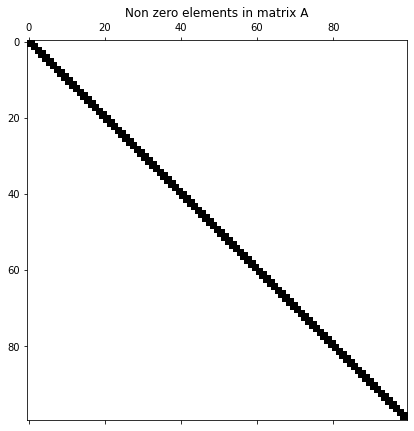

In [5]:
plt.figure(figsize=(7,7))
plt.spy(A)
plt.title("Non zero elements in matrix A")
plt.show()

In [6]:
def fn(u, t, A, b):
    return (np.matmul(A, u) + b)

In [7]:
u = odeint(fn, Uinit, t, args=(A, b))

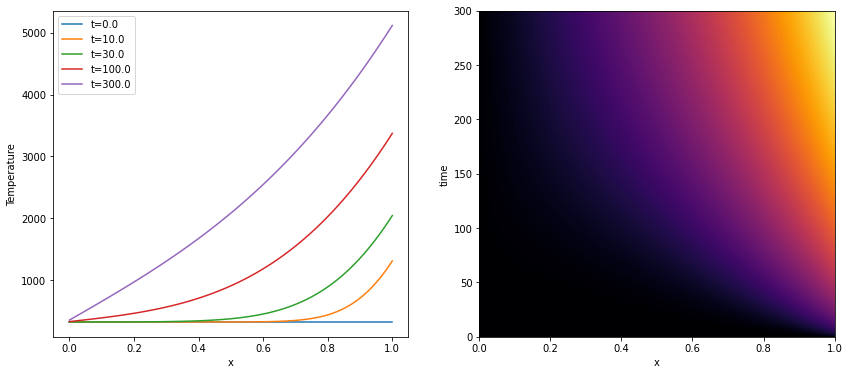

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
# axs[0].set_ylim(300, 300)
axs[0].plot(x, u[0], label=f"t={0/t_steps*tn:0.1f}")
axs[0].plot(x, u[10], label=f"t={10/t_steps*tn:0.1f}")
axs[0].plot(x, u[30], label=f"t={30/t_steps*tn:0.1f}")
axs[0].plot(x, u[99], label=f"t={100/t_steps*tn:0.1f}")
axs[0].plot(x, u[299], label=f"t={300/t_steps*tn:0.1f}")
axs[0].legend()
axs[0].set_ylabel("Temperature")
axs[0].set_xlabel("x")
axs[1].imshow(u, aspect="auto", cmap="inferno", origin="lower", extent=[x0, xn, t0, tn])
axs[1].set_xlabel(f"x")
axs[1].set_ylabel("time")
plt.show()

In [9]:
# Animation of the solution over the integrated time span. 

def animate(frame):
    """ Animation """
    y = u[frame]
    line.set_data((x, y))
    plt.title(f"t={tn * frame / t_steps:0.2f}")

# Create the plot
fig = plt.figure(figsize=(6, 6))
lines = plt.plot([])
line = lines[0]
plt.xlim([0, xn])
plt.ylim([0, 5000])
plt.ylabel("Temperature")
plt.xlabel("x")
plt.title("")
  
anim = FuncAnimation(fig, animate, frames=t_steps, interval=20)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

In [10]:
# Solution u(x,t), where t=tn

u[-1]

array([ 355.26002954,  385.53379068,  415.83189012,  446.16493431,
        476.54352921,  506.97827992,  537.47979043,  568.05866329,
        598.7254993 ,  629.49089726,  660.36545362,  691.35976222,
        722.48441401,  753.7499967 ,  785.16709458,  816.74628813,
        848.49815384,  880.43326388,  912.56218584,  944.8954825 ,
        977.44371154, 1010.21742532, 1043.2271706 , 1076.48348832,
       1109.99691339, 1143.77797443, 1177.83719356, 1212.1850862 ,
       1246.83216088, 1281.78891899, 1317.06585465, 1352.67345453,
       1388.62219764, 1424.9225552 , 1461.58499049, 1498.6199587 ,
       1536.03790681, 1573.84927347, 1612.06448889, 1650.69397473,
       1689.74814405, 1729.2374012 , 1769.17214179, 1809.56275262,
       1850.41961165, 1891.75308801, 1933.57354194, 1975.89132484,
       2018.71677928, 2062.06023902, 2105.9320291 , 2150.34246587,
       2195.30185707, 2240.82050199, 2286.90869151, 2333.57670828,
       2380.83482686, 2428.69331389, 2477.16242827, 2526.25242